In [4]:
import cv2
import sqlite3
import numpy
import statistics 
import sys
import os
import json
import time
import sys
from numpy.lib.function_base import append
import xlsxwriter
import matplotlib.pyplot as plt
from os.path import join
import numpy as np
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D
from _collections import deque
from scipy.signal import argrelextrema

In [5]:
##Computing least-squares solution to equation Ax = b
def plane_fitting_max_point(x,y,z):
    y = y
    x = x
    z = z
    num_points = len(x)
    z_step_size = 1.875

    # plot raw data
    plt.figure()
    ax = plt.subplot(111, projection='3d')
    ax.scatter(x, y, z, color='b')

    ## ax+by+c = z, Ax=B
    tmp_A = []
    tmp_b = []
    for i in range(len(x)):
        tmp_A.append([x[i], y[i], 1])
        tmp_b.append(z[i])

    b = np.matrix(tmp_b).T
    A = np.matrix(tmp_A)

    from scipy.linalg import lstsq
    fit, residual, rnk, s = lstsq(A, b)
    errors =  A * fit - b
    plane_z = A * fit

    for i in range(0,len(x)):
        print("row: ", x[i], " col: ", y[i], " act Z: ", z[i], " plane_z: ", plane_z[i])

    index_min_plane_z = np.argmin(plane_z)
    index_max_plane_z = np.argmax(plane_z)
    print("min_x in list: ", index_min_plane_z, " z value: ", plane_z[index_min_plane_z], " actual min z: ", min(plane_z))
    print("min_x in list: ", index_max_plane_z, " z value: ", plane_z[index_max_plane_z], " actual min z: ", max(plane_z))

    x_z_min_in_microns = x[index_min_plane_z]
    x_z_max_in_microns = x[index_max_plane_z]
    y_z_min_in_microns = y[index_min_plane_z]
    y_z_max_in_microns = y[index_max_plane_z]

    

    max_plane_z_diff  = max(plane_z) - min(plane_z)
    print("max_plane_z_diff: ", max_plane_z_diff)

    absolute_sum = np.sum(abs(errors))
    absolute_sum_mean = absolute_sum/len(errors)
    _max_step_size =  max(abs(errors))/z_step_size
    _max_positive_step_size =  max(errors)/z_step_size
    _max_negative_step_size = min(errors)/z_step_size
    print("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
    print("absolute error: ",absolute_sum," absolute mean error: ", absolute_sum_mean)
    print("max shift: ", max(abs(errors)), "max_step_size: ", max(abs(errors))/z_step_size)
    print("max positive shift: ", max(errors), "max_step_size: ", _max_positive_step_size)
    print("max negative shift: ", min(errors), "max_step_size: ", _max_negative_step_size)

    # plot plane
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                      np.arange(ylim[0], ylim[1]))
    Z = np.zeros(X.shape)
    for r in range(X.shape[0]):
        for c in range(X.shape[1]):
            Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
    ax.plot_wireframe(X,Y,Z, color='k')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    plt.show()
    return(fit)

row:  16  col:  29  act Z:  6716.25  plane_z:  [[6717.44962855]]
row:  13  col:  33  act Z:  6716.25  plane_z:  [[6713.81319732]]
row:  8  col:  30  act Z:  6716.25  plane_z:  [[6716.8518207]]
row:  3  col:  29  act Z:  6718.125  plane_z:  [[6718.00782158]]
row:  18  col:  15  act Z:  6729.375  plane_z:  [[6730.54211022]]
row:  16  col:  7  act Z:  6738.75  plane_z:  [[6738.15847609]]
row:  26  col:  13  act Z:  6731.25  plane_z:  [[6732.08122932]]
row:  33  col:  9  act Z:  6736.875  plane_z:  [[6735.54590885]]
row:  26  col:  27  act Z:  6718.125  plane_z:  [[6718.90287181]]
row:  31  col:  30  act Z:  6716.25  plane_z:  [[6715.86424842]]
row:  37  col:  33  act Z:  6712.5  plane_z:  [[6712.78268712]]
min_x in list:  10  z value:  [[6712.78268712]]  actual min z:  [[6712.78268712]]
min_x in list:  5  z value:  [[6738.15847609]]  actual min z:  [[6738.15847609]]
max_plane_z_diff:  [[25.37578897]]
solution: -0.042938 x + -0.941311 y + 6745.434662 = z
absolute error:  9.720695461353898 

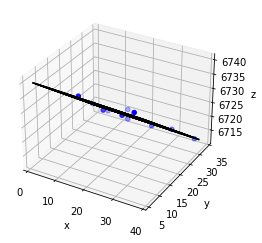

array([[-4.29379252e-02],
       [-9.41311251e-01],
       [ 6.74543466e+03]])

In [7]:
x = [16,13,8,3,18,16,26,33,26,31,37]
y = [29,33,30,29,15,7,13,9,27,30,33]
z = [ 6716.25, 6716.25, 6716.25, 6718.125, 6729.375, 6738.75, 6731.25,6736.875,6718.125,6716.25,6712.5]
# print("For zplane_3d_data_slide, Eq should be:  -0.0429379 x + -0.941311 y + 6745.43 = z ")
plane_fitting_max_point(x,y,z)